2.2 Dimensionality Reduction - PCA (Principal Component Analysis)

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where you want to save the notebook
notebook_path = '/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books'

# Create the directory if it doesn't exist
os.makedirs(notebook_path, exist_ok=True)

print(f"Directory created or already exists: {notebook_path}")

# Note: Saving the notebook programmatically requires additional steps that depend on your environment
# In a standard Colab environment, you typically save the notebook manually through the 'File' menu.
# If you are in a different environment or need programmatic saving, you might need to use specific APIs or libraries.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Directory created or already exists: /drive/My Drive/Colab_Notebooks/Heart_Disease_Project/note_books


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/processed_heart_disease.csv')
# If your target is named 'num', separate features and target
X = df.drop('num', axis=1)
y = df['num']

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

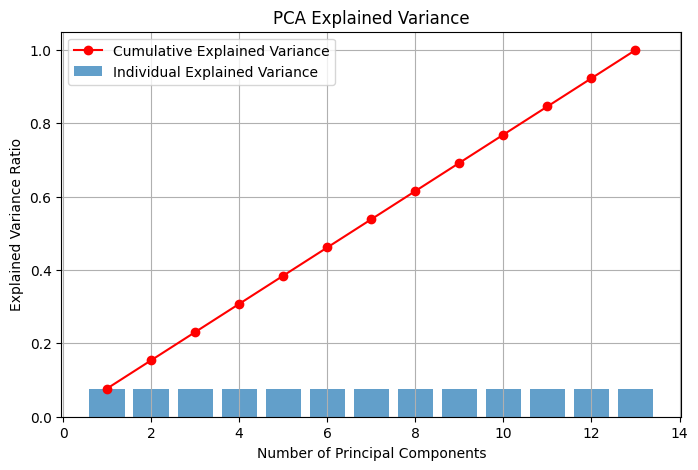

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

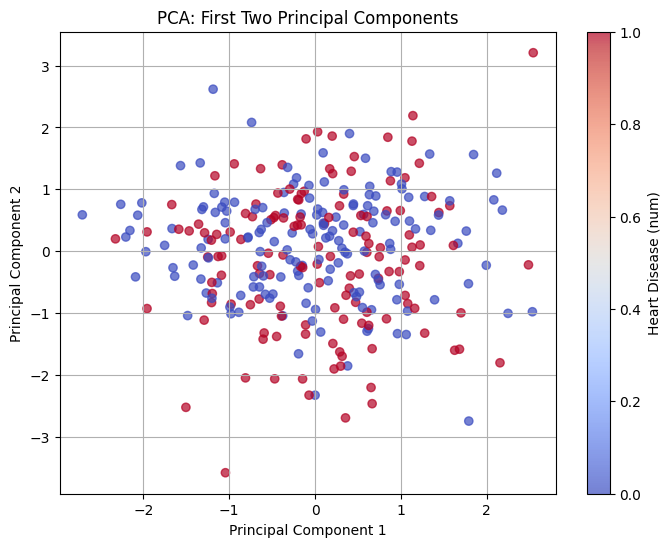

In [6]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(scatter, label='Heart Disease (num)')
plt.grid(True)
plt.show()

In [8]:
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['num'] = y.reset_index(drop=True)
# If you want to save this:
pca_df.to_csv('/content/drive/My Drive/Colab_Notebooks/Heart_Disease_Project/data/processed_heart_disease.csv', index=False)